<a href="https://colab.research.google.com/github/juathanduarte/cncomp/blob/main/CNCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

### **Função de Bisseção**

> Definir a função bisect que recebe como parâmetros a função f, o intervalo [a, b] e a precisão.

In [ ]:
f = lambda x: x**3 - 9*x + 5
a, b = 0.5, 1
precision = 0.01

In [ ]:
def bisect(f, a, b, precision):
    if f(a) * f(b) >= 0:
        print("Bisseção falhou")
        return None
    
    m = (a + b) / 2
    
    while abs(f(m)) >= precision:
        m = (a + b) / 2
        if f(m) == 0:
            return m
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
    return m



> Chamada do método da bissecção e printar a função com a raiz encontrada.



In [ ]:
root = bisect(f, a, b, precision)
print(f"Raiz encontrada: {root}")

Raiz encontrada: 0.578125


> Plotar a função e a raiz encontrada.

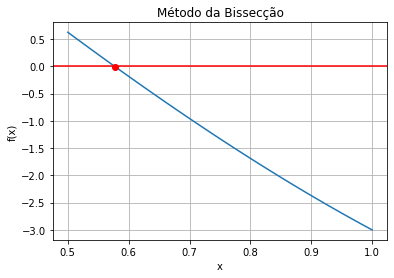

In [ ]:
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y, linestyle='-')
plt.plot(root, f(root), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y=0, color='red')
plt.title('Método da Bissecção')
plt.grid()
plt.show()

### **Função Falsa Posição**

> Definir a função falsePosition que recebe como parâmetros a função f, o intervalo [a, b] e a precisão.



In [ ]:
f = lambda x: x**3 - 9*x + 5
a, b = 0, 1
precision = 0.0005

In [ ]:
def falsePosition(f, a, b, precision):
    if f(a) * f(b) >= 0:
        print("Falsa posição falhou")
        return None
    
    while abs(b - a) >= precision:
        m = (a * f(b) - b * f(a)) / (f(b) - f(a))
        if f(m) == 0:
            return m
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
    return m

> Chamada do método da falsa posição e printar a função com a raiz encontrada.



In [ ]:
root = falsePosition(f, a, b, precision)
print(f"Raiz encontrada: {root}")

Raiz encontrada: 0.5768875239163401




> Plotar a função e a raiz encontrada



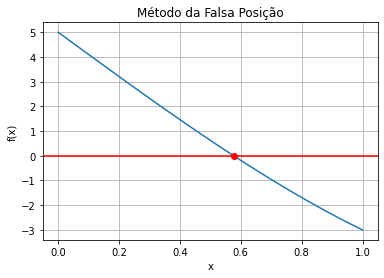

In [ ]:
x = np.linspace(a, b, 100)
y = f(x)
plt.plot(x, y, linestyle='-')
plt.plot(root, f(root), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y=0, color='red')
plt.title('Método da Falsa Posição')
plt.grid()
plt.show()

### **Função Newton Raphson**

>Definir a função newtonRaphson que recebe como parâmetros a função f, o x0 e a precisão.

In [ ]:
x = Symbol('x')
f = (x**3) - (9*x) + 3
x0 = 0.75
precision = 0.01
# f = (x**5) - (10/9) * (x**3) + (5/21) * x

df = f.diff(x)
f1 = lambdify(x, df)
f = lambdify(x, f)

In [ ]:
def newtonRaphson(f, x0, precision):    
    if(abs(f(x0)) < precision):
        print("Newton Raphson falhou")
        return None
    
    k = x0 - f(x0)/f1(x0)
    
    while abs(f(x0)) >= precision:
        x0 = k
        k = x0 - f(x0)/f1(x0)
    return x0

>Chamada do método de Newton Raphson e printar a função com a raiz encontrada.

In [ ]:
root = newtonRaphson(f, x0, precision)
print(f"Raiz encontrada: {root}")

Raiz encontrada: 0.33741514117297


>Plotar a função e a raiz encontrada.

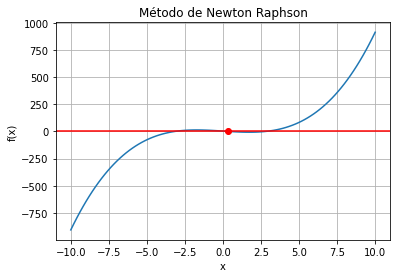

In [ ]:
x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y, linestyle='-')
plt.plot(root, f(root), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y=0, color='red')
plt.title('Método de Newton Raphson')
plt.grid()
plt.show()

### **Função da Secante**

>Definir a função secante que recebe como parâmetros a função f, x0, x1 e a precisão.

In [ ]:
x = Symbol('x')
f = (x**3) - (9*x) + 3
x0 = 0
x1 = 1
precision = 5 * 10**(-4)

df = f.diff(x)
f1 = lambdify(x, df)
f = lambdify(x, f)

In [ ]:
def secante(f, x0, x1, precision):
    if(abs(f(x0)) < precision) or (abs(f(x1)) < precision):
        print("Secante falhou")
        return None
    
    while abs(f(x1)) >= precision:
        x2 = x1 - (f(x1) / (f(x1) - f(x0)) * (x1 - x0))
        
        if abs(f(x2)) < precision:
            return x2
        
        x0 = x1
        x1 = x2
        
        return x2

>Chamada do método da secante e printar a função com a raiz encontrada.

In [ ]:
root = secante(f, x0, x1, precision)
print(f"Raiz encontrada: {root}")

Raiz encontrada: 0.375


>Plotar a função e a raiz encontrada.

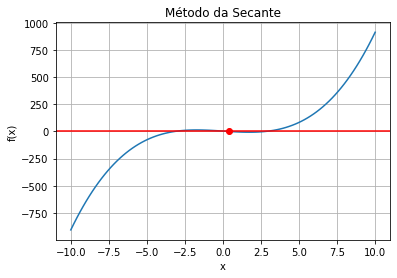

In [ ]:
x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y, linestyle='-')
plt.plot(root, f(root), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y=0, color='red')
plt.title('Método da Secante')
plt.grid()
plt.show()